# **Know before you read: An article classifier for web browsers**

## **Data Exploration**

This project aims to design a text classification algorithm for any articles that are online, trained with the promotional tags used on wikipedia articles. We are hoping that when a user gets into a webstite, before he/she reads the article, the web browser could directly tell if this ariticle is promotional and what type of promotional article is.

In [0]:
#Import packages needed for thata exploration & analysis. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import nltk
#data source: https://www.kaggle.com/urbanbricks/wikipedia-promotional-articles

In [0]:
#Mount the Drive. We suggest that you upload the data to your Google Drive (both promotional and good) due to the size of it. To be able to importt it correctly, just add those two datasets into your Drive in the main space (not inside any folder).
#It is not necessary step but facilitates the running process. 

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Read data into dataframes. 

promotional=pd.read_csv('drive/My Drive/promotional.csv')
good=pd.read_csv('drive/My Drive/good.csv')

In [0]:
#Show first 5 rows of the "good" data. 

good.head()

,text,url
0,Nycticebus linglom is a fossil strepsirrhine p...,https://en.wikipedia.org/wiki/%3F%20Nycticebus...
1,Oryzomys pliocaenicus is a fossil rodent from ...,https://en.wikipedia.org/wiki/%3F%20Oryzomys%2...
2,.hack dt hk is a series of single player actio...,https://en.wikipedia.org/wiki/.hack%20%28video...
3,The You Drive Me Crazy Tour was the second con...,https://en.wikipedia.org/wiki/%28You%20Drive%2...
4,0 8 4 is the second episode of the first seaso...,https://en.wikipedia.org/wiki/0-8-4


In [0]:
#Describe the "good" data. 

good.describe()

,text,url
count,30279,30279
unique,30279,30279
top,The military career of Benedict Arnold in 1775...,https://en.wikipedia.org/wiki/All%27s%20Fair%2...
freq,1,1


In [0]:
#Show first 5 rows of the "promotional" data. 

promotional.head()

,text,advert,coi,fanpov,pr,resume,url
0,"1 Litre no Namida 1, lit. 1 Litre of Tears als...",0,0,1,0,0,https://en.wikipedia.org/wiki/1%20Litre%20no%2...
1,"1DayLater was free, web based software that wa...",1,1,0,0,0,https://en.wikipedia.org/wiki/1DayLater
2,1E is a privately owned IT software and servic...,1,0,0,0,0,https://en.wikipedia.org/wiki/1E
3,1Malaysia pronounced One Malaysia in English a...,1,0,0,0,0,https://en.wikipedia.org/wiki/1Malaysia
4,"The Jerusalem Biennale, as stated on the Bienn...",1,0,0,0,0,https://en.wikipedia.org/wiki/1st%20Jerusalem%...


In [0]:
#Describe "promotional" data. 

promotional.describe()

,advert,coi,fanpov,pr,resume
count,23837.000000,23837.000000,23837.000000,23837.000000,23837.000000
mean,0.793346,0.089860,0.062760,0.063599,0.092210
std,0.404913,0.285988,0.242535,0.244042,0.289328
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


## **Data Cleaning**

In [0]:
#Check information about "promotional" data. 

promotional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23837 entries, 0 to 23836
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    23837 non-null  object
 1   advert  23837 non-null  int64 
 2   coi     23837 non-null  int64 
 3   fanpov  23837 non-null  int64 
 4   pr      23837 non-null  int64 
 5   resume  23837 non-null  int64 
 6   url     23837 non-null  object
dtypes: int64(5), object(2)
memory usage: 1.3+ MB


In [0]:
#Check information about "good" data.

good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30279 entries, 0 to 30278
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30279 non-null  object
 1   url     30279 non-null  object
dtypes: object(2)
memory usage: 473.2+ KB


In [0]:
#Check null values for promotional data. 

promotional.isnull().sum()

text      0
advert    0
coi       0
fanpov    0
pr        0
resume    0
url       0
dtype: int64

In [0]:
#Check null values for good data. 

good.isnull().sum()

text    0
url     0
dtype: int64

In [0]:
#Check for class distribution. Imbalanced dataset.

for tag in promotional.columns[1:6]:
  print(promotional.groupby(tag)['text'].count())

advert
0     4926
1    18911
Name: text, dtype: int64
coi
0    21695
1     2142
Name: text, dtype: int64
fanpov
0    22341
1     1496
Name: text, dtype: int64
pr
0    22321
1     1516
Name: text, dtype: int64
resume
0    21639
1     2198
Name: text, dtype: int64


https://python-graph-gallery.com/11-grouped-barplot/

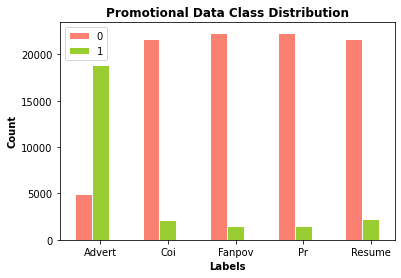

In [0]:
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [4926, 21695, 22341,22321, 21639]
bars2 = [18911, 2142, 1496, 1516, 2198]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='salmon', width=barWidth, edgecolor='white', label='0')
plt.bar(r2, bars2, color='yellowgreen', width=barWidth, edgecolor='white', label='1')

# Add xticks on the middle of the group bars
plt.xlabel('Labels', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Promotional Data Class Distribution', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Advert', 'Coi', 'Fanpov', 'Pr', 'Resume'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


## **Sentiment Analysis**

In [0]:
#Call promotional df of DataFrame. 

df=promotional

In [0]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['text'].apply(pol)
df['subjectivity'] = df['text'].apply(sub)
df.head()

,text,advert,coi,fanpov,pr,resume,url,polarity,subjectivity
0,"1 Litre no Namida 1, lit. 1 Litre of Tears als...",0,0,1,0,0,https://en.wikipedia.org/wiki/1%20Litre%20no%2...,0.089947,0.390735
1,"1DayLater was free, web based software that wa...",1,1,0,0,0,https://en.wikipedia.org/wiki/1DayLater,0.250638,0.374150
2,1E is a privately owned IT software and servic...,1,0,0,0,0,https://en.wikipedia.org/wiki/1E,0.162310,0.370695
3,1Malaysia pronounced One Malaysia in English a...,1,0,0,0,0,https://en.wikipedia.org/wiki/1Malaysia,0.071170,0.403492
4,"The Jerusalem Biennale, as stated on the Bienn...",1,0,0,0,0,https://en.wikipedia.org/wiki/1st%20Jerusalem%...,0.097619,0.206548


In [0]:
good['polarity'] = good['text'].apply(pol)
good['subjectivity'] = good['text'].apply(sub)
good.head()

,text,url,polarity,subjectivity
0,Nycticebus linglom is a fossil strepsirrhine p...,https://en.wikipedia.org/wiki/%3F%20Nycticebus...,-0.005218,0.315810
1,Oryzomys pliocaenicus is a fossil rodent from ...,https://en.wikipedia.org/wiki/%3F%20Oryzomys%2...,-0.037032,0.322307
2,.hack dt hk is a series of single player actio...,https://en.wikipedia.org/wiki/.hack%20%28video...,0.009471,0.448570
3,The You Drive Me Crazy Tour was the second con...,https://en.wikipedia.org/wiki/%28You%20Drive%2...,0.138888,0.456132
4,0 8 4 is the second episode of the first seaso...,https://en.wikipedia.org/wiki/0-8-4,0.121552,0.420470


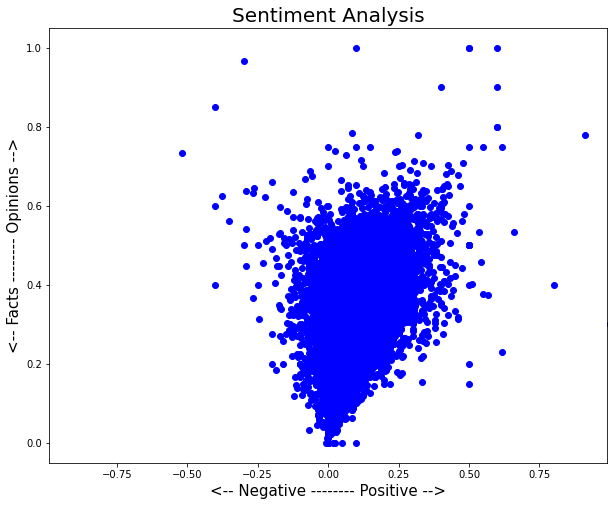

In [0]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, text in enumerate(df.index):
    x = df.polarity.loc[text]
    y = df.subjectivity.loc[text]
    plt.scatter(x, y, color='blue')
    plt.xlim(-.99, .99) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [0]:
for tag in df.columns[1:6]:
  print(df.groupby(tag)[['polarity','subjectivity']].mean())

        polarity  subjectivity
advert                        
0       0.098869      0.333253
1       0.104726      0.351331
     polarity  subjectivity
coi                        
0    0.103530      0.348728
1    0.103371      0.336120
        polarity  subjectivity
fanpov                        
0       0.103236      0.345268
1       0.107690      0.382350
    polarity  subjectivity
pr                        
0   0.103905      0.347731
1   0.097776      0.345601
        polarity  subjectivity
resume                        
0       0.104447      0.353151
1       0.094345      0.292898


In [0]:
advert_sentiment=df.groupby('advert')[['polarity','subjectivity']].mean()
coi_sentiment=df.groupby('coi')[['polarity','subjectivity']].mean()
fanpov_sentiment=df.groupby('fanpov')[['polarity','subjectivity']].mean()
pr_sentiment=df.groupby('pr')[['polarity','subjectivity']].mean()
resume_sentiment=df.groupby('resume')[['polarity','subjectivity']].mean()

polarity_mean=good['polarity'].mean()
subjectivity_mean=good['subjectivity'].mean()
mean_sentiment=[polarity_mean,subjectivity_mean]



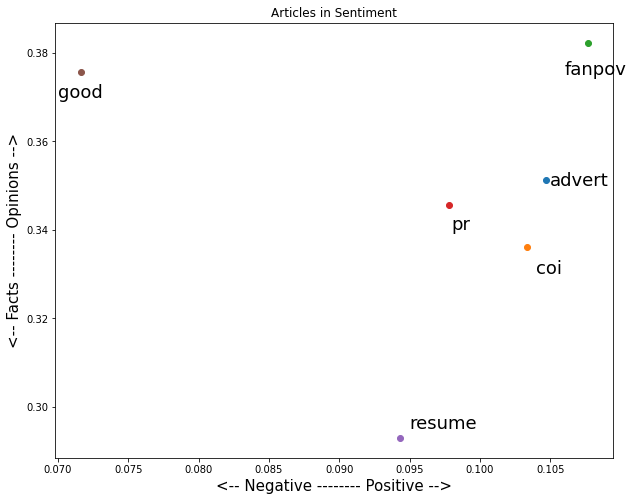

In [0]:
#making the graph
polarity_mean_line_x=[polarity_mean,polarity_mean]
polarity_mean_line_y=[0.3,subjectivity_mean]

subjectivity_mean_line_x=[0.08,polarity_mean]
subjectivity_mean_line_y=[subjectivity_mean,subjectivity_mean]

plt.scatter(advert_sentiment.iloc[1,0],advert_sentiment.iloc[1,1],label='advert')
plt.scatter(coi_sentiment.iloc[1,0],coi_sentiment.iloc[1,1],label='coi')
plt.scatter(fanpov_sentiment.iloc[1,0],fanpov_sentiment.iloc[1,1],label='fanpov')
plt.scatter(pr_sentiment.iloc[1,0],pr_sentiment.iloc[1,1],label='pr')
plt.scatter(resume_sentiment.iloc[1,0],resume_sentiment.iloc[1,1],label='resume')
plt.scatter(polarity_mean,subjectivity_mean,label='good')

plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)
plt.title('Articles in Sentiment')
plt.text(0.098,0.34,'pr',size=18)
plt.text(0.095,0.295,'resume',size=18)
plt.text(0.104,0.33,'coi',size=18)
plt.text(0.07,0.37,'good',size=18)
plt.text(0.105,0.35,'advert',size=18)
plt.text(0.106,0.375,'fanpov',size=18)

plt.show()

In [0]:
advert=df[['text','advert']]
advert=advert[advert['advert']==1]
advert

,text,advert
1,"1DayLater was free, web based software that wa...",1
2,1E is a privately owned IT software and servic...,1
3,1Malaysia pronounced One Malaysia in English a...,1
4,"The Jerusalem Biennale, as stated on the Bienn...",1
6,2ergo is a provider of mobile phone marketing ...,1
...,...,...
23832,ZURICH.MINDS is a non profit foundation set up...,1
23833,"zvelo, Inc. or simply zvelo is a privately hel...",1
23834,Zygote Media Group is a 3D human anatomy conte...,1
23835,Zylom is a distributor of casual games for PC ...,1


In [0]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

advert['polarity'] = advert['text'].apply(pol)
advert['subjectivity'] = advert['text'].apply(sub)
advert.head()

,text,advert,polarity,subjectivity
1,"1DayLater was free, web based software that wa...",1,0.250638,0.374150
2,1E is a privately owned IT software and servic...,1,0.162310,0.370695
3,1Malaysia pronounced One Malaysia in English a...,1,0.071170,0.403492
4,"The Jerusalem Biennale, as stated on the Bienn...",1,0.097619,0.206548
6,2ergo is a provider of mobile phone marketing ...,1,0.294452,0.388859


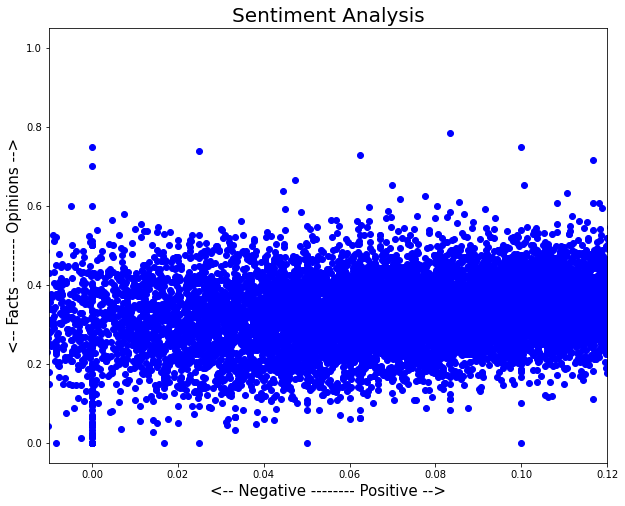

In [0]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, text in enumerate(advert.index):
    x = advert.polarity.loc[text]
    y = advert.subjectivity.loc[text]
    plt.scatter(x, y, color='blue')
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## **Topic Modeling**

References:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#3importpackages

https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#9.-Word-Clouds-of-Top-N-Keywords-in-Each-Topic

### **1. Promotional**

#### **a. Building the LDA Model**

In [0]:
# spacy for lemmatization
import spacy

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess

# NLTK Stop words
from nltk.corpus import stopwords

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# We have already downloaded the stopwords. Let’s import them and make it available in stop_words.

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [0]:
data = df.text.values.tolist()

In [0]:
# Let’s tokenize each text into a list of words, removing punctuations and unnecessary characters altogether.

# Gensim’s simple_preprocess() is great for this. Additionally I have set deacc=True to remove the punctuations.

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['litre', 'no', 'namida', 'lit', 'litre', 'of', 'tears', 'also', 'called', 'diary', 'with', 'tears', 'or', 'diary', 'of', 'tears', 'is', 'japanese', 'television', 'drama', 'for', 'fuji', 'television', 'based', 'on', 'true', 'story', 'of', 'year', 'old', 'girl', 'named', 'aya', 'kito', 'who', 'suffered', 'from', 'degenerative', 'disease', 'and', 'died', 'at', 'the', 'age', 'of', 'the', 'script', 'is', 'based', 'on', 'aya', 'diary', 'that', 'she', 'kept', 'writing', 'until', 'she', 'could', 'no', 'longer', 'hold', 'pen', 'the', 'diary', 'is', 'later', 'entitled', 'one', 'litre', 'of', 'tears', 'which', 'has', 'sold', 'over', 'million', 'copies', 'in', 'japan', 'fifteen', 'year', 'old', 'ikeuchi', 'aya', 'is', 'an', 'ordinary', 'girl', 'soon', 'to', 'be', 'high', 'school', 'student', 'and', 'daughter', 'of', 'family', 'who', 'works', 'at', 'tofu', 'shop', 'as', 'time', 'passes', 'unusual', 'things', 'start', 'happening', 'to', 'aya', 'she', 'begins', 'falling', 'down', 'often', 'and', 'w

In [0]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['litre', 'no', 'namida', 'lit', 'litre', 'of', 'tears', 'also', 'called', 'diary', 'with', 'tears', 'or', 'diary', 'of', 'tears', 'is', 'japanese', 'television', 'drama', 'for', 'fuji', 'television', 'based', 'on', 'true', 'story', 'of', 'year', 'old', 'girl', 'named', 'aya', 'kito', 'who', 'suffered', 'from', 'degenerative', 'disease', 'and', 'died', 'at', 'the', 'age', 'of', 'the', 'script', 'is', 'based', 'on', 'aya', 'diary', 'that', 'she', 'kept', 'writing', 'until', 'she', 'could', 'no_longer', 'hold', 'pen', 'the', 'diary', 'is', 'later', 'entitled', 'one', 'litre', 'of', 'tears', 'which', 'has', 'sold', 'over', 'million', 'copies', 'in', 'japan', 'fifteen', 'year', 'old', 'ikeuchi', 'aya', 'is', 'an', 'ordinary', 'girl', 'soon', 'to', 'be', 'high', 'school', 'student', 'and', 'daughter', 'of', 'family', 'who', 'works', 'at', 'tofu', 'shop', 'as', 'time', 'passes', 'unusual', 'things', 'start', 'happening', 'to', 'aya', 'she', 'begins', 'falling', 'down', 'often', 'and', 'walki

In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [0]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['know', 'single', 'think', 'relate', 'live', 'material', 'sufficient', 'assign', 'specie', 'specie', 'name', 'therefore', 'use', 'open', 'nomenclature', 'width', 'tooth', 'small', 'primate', 'triangular', 'shape', 'support', 'single', 'root', 'show', 'main', 'cusp', 'addition', 'various', 'crest', 'absence', 'fourth', 'cusp', 'distinguish', 'various', 'prosimian', 'primate', 'describe', 'french', 'paleontologist', 'animal', 'know', 'single', 'tooth', 'basis', 'comparison', 'prosimian', 'primate', 'conclude', 'closely_relate', 'live', 'slow_lorise', 'however', 'view', 'limited', 'material', 'tentatively', 'assign', 'fossil', 'specie', 'use', 'open', 'nomenclature', 'specific', 'name', 'word', 'single', 'know', 'tooth', 'third', 'know', 'tiny', 'width', 'smallest', 'know', 'triangular', 'shape', 'show', 'simple', 'reduce', 'morphology', 'important', 'cuspsthe', 'protocone', 'present', 'connect', 'low', 'rounded', 'metacone', 'locate', 'closer', 'front', 'lingual', 'corner', 'side', 'to

In [0]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 5), (11, 3), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 2), (41, 1), (42, 5), (43, 2), (44, 1), (45, 5), (46, 1), (47, 1), (48, 1), (49, 1), (50, 2), (51, 1), (52, 1), (53, 2), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 2), (68, 1), (69, 1), (70, 1), (71, 3), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 3), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 1)

In [0]:
#Find out coherence score for different number of topics. The coherence score finds the OPTIMAL number of topics. This function allows the model to run with different numbers of topics and find the coherence score for each one. That's why takes LONG time to run. 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word,random_state=100,passes=10, chunksize=100,alpha='auto',per_word_topics=True )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
# CAN TAKE LONG TIME TO RUN. IT TOOK FOR ME LIKE 3 HOURS MINIMUM. 
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

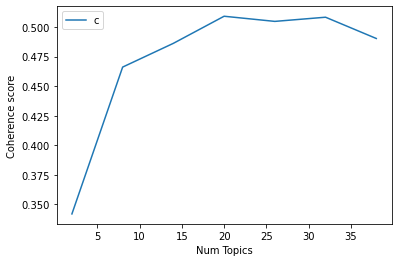

In [0]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3419
Num Topics = 8  has Coherence Value of 0.4661
Num Topics = 14  has Coherence Value of 0.4862
Num Topics = 20  has Coherence Value of 0.5091
Num Topics = 26  has Coherence Value of 0.5047
Num Topics = 32  has Coherence Value of 0.5083
Num Topics = 38  has Coherence Value of 0.4903


In [0]:
# Build LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [0]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.055*"research" + 0.034*"science" + 0.026*"study" + 0.023*"technology" + 0.014*"field" + 0.013*"library" + 0.013*"engineering" + 0.011*"scientific" + 0.010*"university" + 0.010*"development"'), (1, '0.027*"system" + 0.017*"software" + 0.014*"use" + 0.014*"application" + 0.012*"include" + 0.012*"design" + 0.012*"technology" + 0.011*"base" + 0.010*"support" + 0.010*"model"'), (2, '0.020*"time" + 0.019*"would" + 0.018*"first" + 0.014*"take" + 0.014*"become" + 0.014*"make" + 0.013*"go" + 0.012*"later" + 0.011*"year" + 0.010*"come"'), (3, '0.050*"game" + 0.049*"team" + 0.030*"player" + 0.021*"event" + 0.019*"sport" + 0.018*"season" + 0.017*"play" + 0.016*"win" + 0.015*"race" + 0.013*"competition"'), (4, '0.020*"military" + 0.014*"operation" + 0.014*"unit" + 0.011*"aircraft" + 0.011*"training" + 0.011*"force" + 0.010*"system" + 0.010*"service" + 0.010*"traffic" + 0.009*"flight"'), (5, '0.026*"use" + 0.011*"process" + 0.010*"datum" + 0.010*"test" + 0.008*"language" + 0.008*"create" + 0

In [0]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.509099156455677


#### **b. Visualizing Topics with Wordcloud**

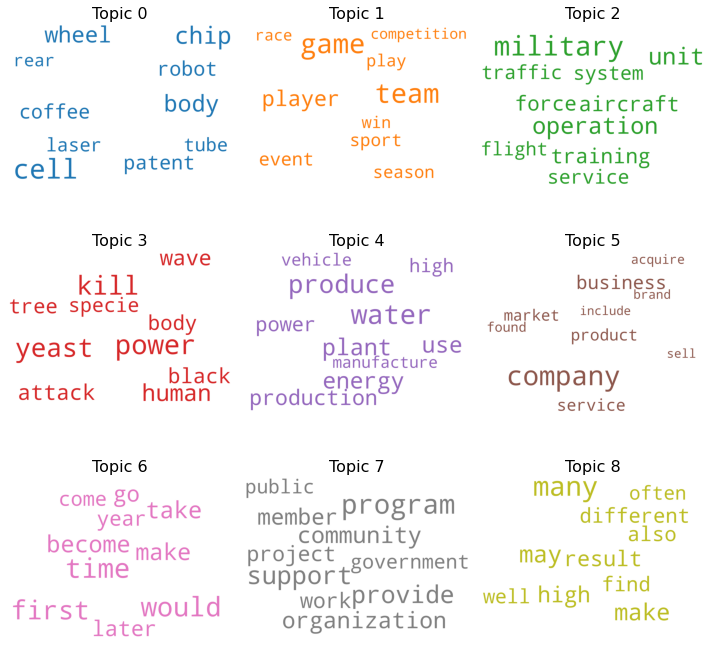

In [0]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### **2. Good Articles**

#### **a. Building the LDA Model**

In [0]:
#This time we follow the same steps as the previous LDA Model but for the good articles data. 

good_articles=good.text

In [0]:
data = good_articles.values.tolist()

In [0]:
# Let’s tokenize each sentence into a list of words, removing punctuations and unnecessary characters altogether.

# Gensim’s simple_preprocess() is great for this. Additionally I have set deacc=True to remove the punctuations.

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['nycticebus', 'linglom', 'is', 'fossil', 'strepsirrhine', 'primate', 'from', 'the', 'miocene', 'of', 'thailand', 'known', 'only', 'from', 'single', 'tooth', 'an', 'upper', 'third', 'molar', 'it', 'is', 'thought', 'to', 'be', 'related', 'to', 'the', 'living', 'slow', 'lorises', 'genus', 'nycticebus', 'but', 'the', 'material', 'is', 'not', 'sufficient', 'to', 'assign', 'the', 'species', 'to', 'nycticebus', 'with', 'certainty', 'and', 'the', 'species', 'name', 'therefore', 'uses', 'open', 'nomenclature', 'with', 'width', 'of', 'mm', 'this', 'tooth', 'is', 'very', 'small', 'for', 'primate', 'it', 'is', 'triangular', 'in', 'shape', 'supported', 'by', 'single', 'root', 'and', 'shows', 'three', 'main', 'cusps', 'in', 'addition', 'to', 'various', 'crests', 'the', 'absence', 'of', 'fourth', 'cusp', 'the', 'hypocone', 'distinguishes', 'it', 'from', 'various', 'other', 'prosimian', 'primates', 'nycticebus', 'linglom', 'was', 'described', 'in', 'by', 'french', 'paleontologists', 'pierre', 'mein'

In [0]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['nycticebus', 'linglom', 'is', 'fossil', 'strepsirrhine_primate', 'from', 'the', 'miocene', 'of', 'thailand', 'known', 'only', 'from', 'single', 'tooth', 'an', 'upper', 'third', 'molar', 'it', 'is', 'thought', 'to', 'be', 'related', 'to', 'the', 'living', 'slow_lorises', 'genus_nycticebus', 'but', 'the', 'material', 'is', 'not', 'sufficient', 'to', 'assign', 'the', 'species', 'to', 'nycticebus', 'with', 'certainty', 'and', 'the', 'species', 'name', 'therefore', 'uses', 'open', 'nomenclature', 'with', 'width', 'of', 'mm', 'this', 'tooth', 'is', 'very', 'small', 'for', 'primate', 'it', 'is', 'triangular', 'in', 'shape', 'supported', 'by', 'single', 'root', 'and', 'shows', 'three', 'main', 'cusps', 'in', 'addition', 'to', 'various', 'crests', 'the', 'absence', 'of', 'fourth', 'cusp', 'the', 'hypocone', 'distinguishes', 'it', 'from', 'various', 'other', 'prosimian', 'primates', 'nycticebus', 'linglom', 'was', 'described', 'in', 'by', 'french', 'paleontologists', 'pierre', 'mein', 'and', '

In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [0]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['know', 'single', 'think', 'relate', 'live', 'material', 'sufficient', 'assign', 'specie', 'specie', 'name', 'therefore', 'use', 'open', 'nomenclature', 'width', 'tooth', 'small', 'primate', 'triangular', 'shape', 'support', 'single', 'root', 'show', 'main', 'cusp', 'addition', 'various', 'crest', 'absence', 'fourth', 'cusp', 'distinguish', 'various', 'prosimian', 'primate', 'describe', 'french', 'paleontologist', 'animal', 'know', 'single', 'tooth', 'basis', 'comparison', 'prosimian', 'primate', 'conclude', 'closely_relate', 'live', 'slow_lorise', 'however', 'view', 'limited', 'material', 'tentatively', 'assign', 'fossil', 'specie', 'use', 'open', 'nomenclature', 'specific', 'name', 'word', 'single', 'know', 'tooth', 'third', 'know', 'tiny', 'width', 'smallest', 'know', 'triangular', 'shape', 'show', 'simple', 'reduce', 'morphology', 'important', 'cuspsthe', 'protocone', 'present', 'connect', 'low', 'rounded', 'metacone', 'locate', 'closer', 'front', 'lingual', 'corner', 'side', 'to

In [0]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 5), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 4), (38, 2), (39, 1), (40, 5), (41, 2), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 2), (48, 7), (49, 2), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 3), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 2), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 2), (71, 2), (72, 1), (73, 2), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 3), (80, 4), (81, 2), (82, 2), (83, 1), (84, 3), (85, 1), (86, 1), (87, 1), (88, 3), (89, 1), (90, 2), (91, 1), (92, 1), (93, 1), (94, 2), (95, 2), (96, 3), (97, 1), (98, 6), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 4), (105, 1), (106, 4), (107, 1), (108, 1), (109, 1), (110, 1)

In [0]:
#Find out coherence score for different number of topics. The coherence score finds the OPTIMAL number of topics. This function allows the model to run with different numbers of topics and find the coherence score for each one. That's why takes LONG time to run. 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word,random_state=100,passes=10, chunksize=100,alpha='auto',per_word_topics=True )
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [0]:
# CAN TAKE LONG TIME TO RUN. We ran this model with 25 topics, as opposed to 40, because it was taking very long time with 40 topics that we wouldn't even get results. 
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=25, step=6)


# Compute the running time. The result is: 0.009213160710005467 milliseconds, which is 2.5 hours. 
import timeit
code_to_test = """
a = range(100000)
b = []
for i in a:
    b.append(i*2)
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print(elapsed_time,'milliseconds.')

0.009213160710005467 milliseconds.


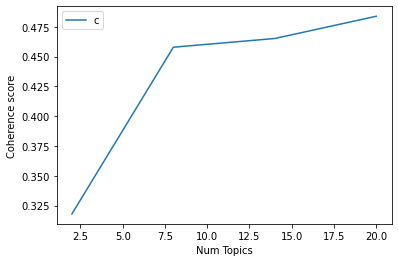

In [0]:
# Show graph
limit=25; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3181
Num Topics = 8  has Coherence Value of 0.4579
Num Topics = 14  has Coherence Value of 0.4652
Num Topics = 20  has Coherence Value of 0.4838


In [0]:
# Build LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

# Compute the running time.
import timeit
code_to_test = """
a = range(100000)
b = []
for i in a:
    b.append(i*2)
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print(elapsed_time,'milliseconds.')

0.009424644899991109 milliseconds.


In [0]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.026*"attack" + 0.025*"force" + 0.015*"battle" + 0.013*"troop" + 0.013*"division" + 0.010*"capture" + 0.010*"fight" + 0.009*"man" + 0.009*"order" + 0.009*"fire"'), (1, '0.019*"city" + 0.018*"tooth" + 0.018*"wall" + 0.017*"turkish" + 0.013*"byzantine" + 0.013*"accord" + 0.012*"son" + 0.012*"greek" + 0.010*"ad" + 0.010*"however"'), (2, '0.024*"station" + 0.023*"highway" + 0.023*"route" + 0.019*"line" + 0.019*"road" + 0.014*"state" + 0.012*"train" + 0.011*"run" + 0.010*"pass" + 0.010*"continue"'), (3, '0.026*"wind" + 0.023*"storm" + 0.018*"damage" + 0.012*"day" + 0.012*"people" + 0.011*"cause" + 0.011*"system" + 0.011*"area" + 0.009*"island" + 0.009*"report"'), (4, '0.052*"game" + 0.024*"team" + 0.022*"player" + 0.020*"match" + 0.018*"first" + 0.013*"play" + 0.013*"season" + 0.012*"score" + 0.012*"time" + 0.011*"win"'), (5, '0.038*"episode" + 0.027*"show" + 0.018*"say" + 0.018*"season" + 0.011*"go" + 0.009*"television" + 0.009*"write" + 0.009*"get" + 0.009*"series" + 0.009*"would"'

In [0]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4838381847343555


#### **b. Visualizing Topics with Wordcloud**

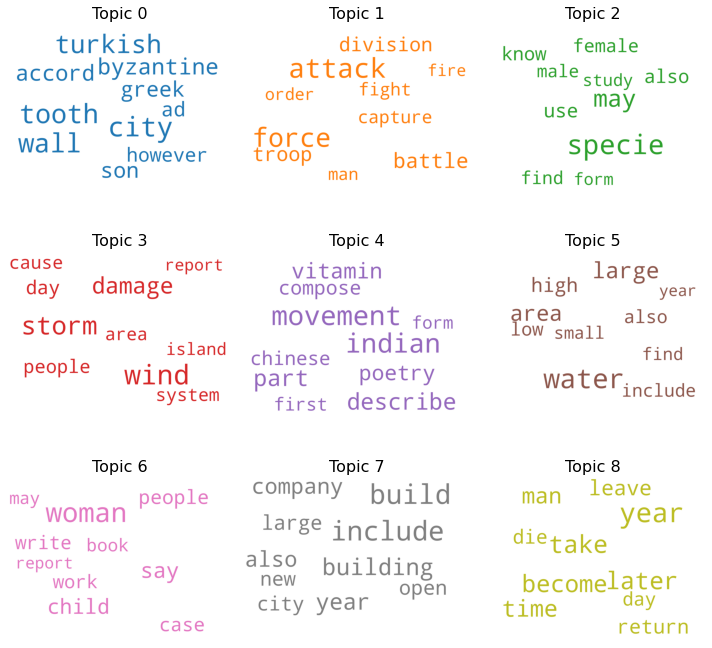

In [0]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

##**Classifier**##

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

promotional=pd.read_csv('drive/My Drive/promotional.csv')
good=pd.read_csv('drive/My Drive/good.csv')
good['promotional']=0
promotional['promotional']=1

In [0]:
database=pd.concat([good,promotional])
database=database.fillna(0)
database.head()

,text,url,promotional,advert,coi,fanpov,pr,resume
0,Nycticebus linglom is a fossil strepsirrhine p...,https://en.wikipedia.org/wiki/%3F%20Nycticebus...,0,0.0,0.0,0.0,0.0,0.0
1,Oryzomys pliocaenicus is a fossil rodent from ...,https://en.wikipedia.org/wiki/%3F%20Oryzomys%2...,0,0.0,0.0,0.0,0.0,0.0
2,.hack dt hk is a series of single player actio...,https://en.wikipedia.org/wiki/.hack%20%28video...,0,0.0,0.0,0.0,0.0,0.0
3,The You Drive Me Crazy Tour was the second con...,https://en.wikipedia.org/wiki/%28You%20Drive%2...,0,0.0,0.0,0.0,0.0,0.0
4,0 8 4 is the second episode of the first seaso...,https://en.wikipedia.org/wiki/0-8-4,0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = database.text
y = database[['promotional','advert','coi','fanpov','pr','resume']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 4)

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

accuracy 0.8086849399445643
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7086
           1       0.82      0.85      0.83      5603
           2       0.00      0.00      0.00       628
           3       0.00      0.00      0.00       465
           4       0.00      0.00      0.00       434
           5       0.95      0.03      0.05       665

   micro avg       0.89      0.74      0.81     14881
   macro avg       0.45      0.29      0.30     14881
weighted avg       0.80      0.74      0.75     14881
 samples avg       0.36      0.33      0.34     14881



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
text_test=" .hack dt hk is a series of single player action role playing video games developed for the PlayStation 2 console by CyberConnect2 and published by Bandai. The four games, .hack Infection, .hack Mutation, .hack Outbreak, and .hack Quarantine, all feature a game within a game , a fictional massively multiplayer online role playing game MMORPG called The World which does not require the player to connect to the Internet. Players may transfer their characters and data between games in the series. Each game comes with an extra DVD containing an episode of .hack Liminality, the accompanying original video animation OVA series which details fictional events that occur concurrently with the games. The games are part of a multimedia franchise called Project .hack, which explores the mysterious origins of The World. Set after the events of the anime series, .hack Sign, the games focus on a player character named Kite and his quest to discover why some users have become comatose in the real world as a result of playing The World. The search evolves into a deeper investigation of the game and its effects on the stability of the Internet. Critics gave the series mixed reviews. It was praised for its unique setting and its commitment to preserve the suspension of disbelief, as well as the character designs. However, it was criticized for uneven pacing and a lack of improvement between games in the series. The commercial success of the franchise led to the production of .hack fragmenta remake of the series with online capabilities, solely for the Japanese PS2and .hack G.U., another video game trilogy, which started its release in 2006 for the PS2 and concluded in 2017 with a remastered trilogy for the PS4 and Windows titled .hack G.U. Last Recode . .hack simulates an MMORPG players assume the role of a participant in a fictional game called The World. The player controls the on screen player character Kite from a third person perspective but first person mode is available. The player manually controls the viewing perspective using the game controller. Within the fictional game, players explore monster infested fields and dungeons, and Root Towns that are free of combat. They can also log off from The World and return to a computer desktop interface which includes in game e mail, news, message boards, and desktop and background music customization options. The player may save the game to a memory card both from the desktop and within The World at a Save Shop. A Data Flag appears on the save file after the player completes the game, allowing the transfer of all aspects of the player character and party members to the next game in the series. The series is typical of action role playing games, in which players attack enemies in real time. The game's action pauses whenever the menu is opened to select magic to cast, items to use, or skills to perform. The player directly controls Kite and the other characters are controlled by artificial intelligence. The player may either provide the computer controlled characters with guidelines attack , first aid , magic , etc. or issue direct commands. Most hostile creatures are contained within magic portals and combat will not begin until the player character approaches the portal and releases the monsters inside. Kite possesses a unique ability called Data Drain which allows him to transform these enemies into rare items. Many boss monsters are known as Data Bugs enemies with corrupted data which gives them infinite health. Data Drain is used to repair the damaged monsters' data and render them vulnerable but its use increases Kite's level of infection, randomly causing harmful side effects. The infection can be cured by defeating enemies without Data Drain. Root Towns are non combat areas of The World where the player may restock items, buy equipment, or chat and trade with other players of The World. In many towns, the player may also raise a sentient, pig like creature called a Grunty, which can be ridden in fields and in later games raced for prizes. A blue portal called the Chaos Gate is used to travel between towns called servers and to access the fields and dungeons where battles occur. A three word password system controls the characteristics of each area attributes such as the prevalence of monsters or items change depending on the properties of each word in the password phrase. Certain plot related areas have restricted access, but the player character has an ability called Gate Hacking which allows him to access these areas using Virus Cores obtained through Data Drain. The .hack games are set in an alternate timeline of Earth, in the year 2010. After a computer virus called Pluto's Kiss crashes nearly every computer in the world, access to the Internet is closed to the general public to address security concerns. After two years without the Internet and online games, a MMORPG called The World is released. It becomes the most popular online game of all time with over 20 million unique players. Shortly before the events portrayed in the .hack games, a number of users become comatose as a result of playing The World. However, the developers blame their condition on cyberterrorism. The World was developed by a German programmer named Harald Hoerwick its backstory is based on the Epitaph of Twilight, an epic poem by Emma Wielant. Her death inspired Hoerwick to create the game. Elements of the poem are coded into the game's programming. The hidden purpose of Hoerwick's game is to develop the ultimate artificial intelligence AI , which is capable of making decisions for itself. To this end, Hoerwick inserted functions into the system which monitor and extract behavioral data from millions of the game's players to aid in the AI's learning process. After Hoerwick's death, these pieces of code became black boxes to the current developers, who cannot fathom their purpose, yet are critical to the proper functioning of the game. The main protagonist of .hack is Kite, a new player of The World whose friend Orca becomes comatose under mysterious circumstances. Kite is joined by nearly twenty other players in his quest to solve the mystery of the coma victims. The players who have the greatest impact on the success of Kite's mission are BlackRose, a fellow newbie to The World whose brother is also in a coma Balmung, a legendary player who seeks to eliminate sources of corruption in the game he loves and Wiseman, an information broker who becomes a key strategist for Kite's team. Helba, a professional hacker, and Lios, a reluctant system administrator, also aid in Kite's efforts to rescue the coma victims. In .hack Infection, Kite's friend Orca invites him to play The World. In the first dungeon they visit, they encounter a girl in white, Aura, being chased by a humanoid monster. Aura tries to entrust Orca with an item called the Book of Twilight , but the monster attacks him, crashing The World's servers. Kite's player discovers that Yasuhiko, Orca's player, has fallen comatose after the attack, and resolves to discover the cause. Kite meets BlackRose, who takes him to a cathedral where they are attacked by a headless swordsman. The legendary player Balmung appears and defeats it, but the monster revives itself as a Data Bug. The Book of Twilight then activates, altering Kite's character data and giving him the Twilight Bracelet. He uses its Data Drain to correct the swordsman's code, allowing Balmung to kill it. Balmung accuses Kite of causing the viral infection spreading through the game, and leaves. Kite and BlackRose decide to cooperate to help the coma victims. After investigating a number of leads, Kite and BlackRose track down Skeith, the creature that put Orca into a coma. They defeat Skeith, but it transforms into a larger enemy called Cubia, from which they escape. In .hack Mutation, Kite and BlackRose encounter system administrator Lios, who declares Kite's bracelet to be an illegal hack. He tries to delete Kite's character data, but fails due to Kite's data being encrypted by the Book of Twilight. Helba intervenes, and convinces Lios to observe Kite for the time being. Lios directs them to an area where they find Innis, a monster with powers similar to Skeith's. Upon defeating Innis, Kite receives an e mail from Aura, who reveals that she is an AI. They travel to an area to meet her but Cubia attacks them, and they repel the monster with difficulty. Short on leads, they contact Wiseman, who is intrigued by Kite's bracelet. He suggests that Skeith and Innis are based on the Cursed Wave , an antagonistic force featured in the poem Epitaph of Twilight, upon which The World is based. Wiseman helps grant them access to Net Slum, a place known as a paradise for hackers and wandering AIs. Upon arrival, another Cursed Wave monster called Magus attacks them. They defeat it and return to the Root Town, where they discover that the computer virus has spread to The World's main servers and into the real world. In .hack Outbreak, Balmung realizes that he cannot end the situation on his own, and joins Kite's quest. BlackRose tells Kite that her brother became comatose under similar circumstances as Orca, which renews both characters' determination. Wiseman formulates a plan to combat the Cursed Wave, enlisting Helba's assistance. Their teamwork destroys the Wave monster Fidchell, but the aftermath causes networks in the real world to malfunction. Aura contacts Kite again, but their meeting is cut short by Cubia's reappearance. Lios, observing Cubia's power, agrees to join Kite, Helba, and the others to combat the Cursed Wave. In the resulting operation, the team pools their resources to defeat another Wave monster called Gorre, with no repercussions in the real world. .hack Quarantine sees the current server becoming increasingly unstable. To fix the problem, Helba replaces it with a copy of the Net Slum. At the bottom of a dungeon, Kite encounters Mia, a member of his party."
#change the test text here

In [0]:
y_pred_2 = nb.predict([text_test])

if 1 not in y_pred_2[0]:
  print('Wow, a good article with no promotional tones.')
if y_pred_2[0][1]==1:
  print('It is clearly an advertisement.')
if y_pred_2[0][2]==1:
  print('There seems like a conflict of interest for this article.')
if y_pred_2[0][3]==1:
  print('Is it written by a fan?')
if y_pred_2[0][4]==1:
  print('I read this before in a press release or news.')
if y_pred_2[0][5]==1:
  print('It is written like a resume')


Wow, a good article with no promotional tones.
